## FUJITSU CONFIDENTIAL

# ハンズオンセミナー講義資料

<div align="right">
Date:2025.7.25
</div>

# ⚠️ [注意‼]  
本資料の内容，結果等の公開は禁止とさせていただきます。予めご了承ください。


# Contents
本日のハンズオンセミナ（第2部）で使用する説明資料の構成は以下の通りです．
1. SDKの紹介  
    1.1 Google Colabを使ったSDK利用環境の準備    
    1.2 利用できる量子デバイス  
    1.3 量子回路シミュレータを使用したタスクの実行  
    1.4 量子コンピュータを使用したタスクの実行  
    1.5 タスクリストの取得  
    1.6 タスクの詳細設定  
2. Groverのアルゴリズムの実行  
    2.1 Groverのアルゴリズムの紹介  
    2.2 量子コンピュータを使用したGroverのアルゴリズムの実行

# 1. 量子クラウドプラットフォーム SDKの紹介
本ハンズオンでは, 量子クラウドを介した量子コンピュータや量子回路シミュレータへのタスク投入，結果の確認等に`fujitsu-quantum`（以下，SDK）を利用します．SDKを使うことで量子クラウドのすべての機能を利用することができます．PyPIを通じて利用可能です.  

## 1.1 SDKのインストール
下記コマンドを実行してSDKをインストールしてください．なお，ライブラリの依存性に関するエラーが表示されますが，動作に問題ありません. 事前に送付いたしました資料を参考にSDKの利用環境を整備されている方は，省略していただいても問題ありません。


In [ ]:
! pip install fujitsu-quantum

## 1.1.2 各種ライブラリのインストール
本セミナーで使用する関連ライブラリのインストールしてください

In [ ]:
! pip install qiskit Matplotlib qiskit_qasm3_import pylatexenc

## 1.1.3 認証
SDKを用いて量子クラウドを利用するためには認証が必要です．事前資料で準備したUsername，PW，MFA機器を用い，`login()`関数を実行してログインしてください．

In [ ]:
from fujitsu_quantum.cmd import login, test, logout
login()

## 1.1.4 インストール後の動作確認
認証後，`test()`関数を実行してください．

In [ ]:
test()

以上で，SDKの動作確認は終了です．

認証したTokenはデバイスごとに発行，格納されます．なお，Tokenの有効期間は，アカウント削除に伴い失効するためハンズオン期間中のみです．

> ⚠️ [Note]   
> - Shellでログインされる方は，以下を参考に`username`，`password`，`TOTP code`(MFAcode)を入力してください．   
>> $ fujitsu-quantmu login    
>> Enter username: ***    
>> Enter password: **********    
>> Enter the a TOTP code (6 digits) for MFA: ******   
>> Authetificaton succeeded    
>> Successfully login   
> - 認証情報は，defaultでは以下の各OSのホームディレクトリ直下の`.fujitsu-quantum`に格納されます．  
>> - Linux/MacOS  
>>  home/.fujitsu-quantum   
>> - Windows  
>>  home/.fujitsu-quantum   

## 1.2 利用できる量子デバイス

富士通の量子クラウドで利用できる量子デバイスは，以下の3種類です．  
- 量子コンピュータ実機（64bit機）
- 量子コンピュータ実機（256bit機）
- 量子回路シミュレータ

これらのデバイスリストは，`Devices.list()` で取得でき，以下の情報を取得できます．  

| パラメータ| 説明 |
|----|----|  
| `device_id` | デバイス名　　　　　　　ex. SC：量子コンピュータ， SVSim：量子回路シミュレータ|
| `device_type` | デバイスの種類　　　　　ex. QPU，Simulator |
| `description` | デバイスの詳細　　　　　ex. Superconducting quantum computer ... |
| `status` | デバイスのステータス　　ex. available, maintenance, など |
| `n_qubits` | 利用可能な量子ビット数 |
| `basic_gates` | デバイスがサポートするゲートの種類
| `pending_tasks` | 実行待ちのタスク数

In [ ]:
from fujitsu_quantum.devices import Devices

devices = Devices.list()

for dev in devices:
    print(f'{dev.device_id       =}') # device ID (e.g., SVSim)
    print(f'{dev.device_type     =}') # QPU or Simulator
    print(f'{dev.description     =}') # description of the device
    print(f'{dev.status          =}') # device status (e.g., available, maintenance, reserved, etc.)
    print(f'{dev.n_qubits        =}') # the number of available qubits
    print(f'{dev.basis_gates     =}') # quantum gates the device supports
    print(f'{dev.n_pending_tasks =}') # the number of tasks waiting for execution
    print('-------------------------')


### 1.2.1 量子コンピュータのパラメータ
特定のデバイスの情報を知りたいときは，`Device.get(device_id)` を使用します．例として量子コンピュータ実機（`device_id='SC'`）のパラメータリストを取得します．

In [ ]:
from fujitsu_quantum.devices import Devices
dev_sc = Devices.get('SC')
print(dev_sc)

### 1.2.2 量子回路シミュレータのパラメータ

同様に，量子回路シミュレータ(`device_id='SVSim'`)の情報を取得したいときは，

In [ ]:
from fujitsu_quantum.devices import Devices
dev_sim = Devices.get('SVSim')
print(dev_sim)

以上のように取得できます．

また，特定の量子デバイスの利用の可否の状態を知りたい場合は，`Devices.get(...)` 関数と知りたいデバイスのパラメータ（`device_Id`，`status`）を使い，以下のように取得できます．

In [ ]:
from fujitsu_quantum.devices import Devices
dev = Devices.get('SVSim')
print(f'{dev.status=}')

# もしくは，
print(Devices.get('SC').status)

### 1.2.3 計算できるタスクの種類

量子クラウドでサポートする量子タスクは，サンプリング計算と期待値計算，ハイブリッド計算の3種類です．前2者をプリミティブタスクと呼び，サンプリングタスク，期待値タスクと呼びます．本資料ではプリミティブタスクについて説明いたします

| タイプ | 詳細 |
|----|----|
|　サンプリングタスク　|　量子回路を実行して準備された量子状態からサンプリングします
|　期待値タスク　|　量子回路を実行して準備された量子状態に対するオブザーバブル（オペレータ）の期待値を計算します．
| ハイブリッドタスク　|　ユーザーが書いたプログラム全体を実行します．これらのプログラムには古典的な部分と量子部分の両方が含まれ，量子デバイスの近くにあるサーバーマシンで実行されます．

次節以降では，量子回路シミュレータ，量子コンピュータ実機を用い，サンプリングタスクの実行とタスクの詳細について説明します．

内容  
- サンプリングタスク
- 期待値タスク
- 各タスクの設定
- 結果の取得
- ヘルパー関数

## 1.3 量子回路シミュレータを使ったタスクの実行

本節では，量子回路シミュレータで実際にサンプリングタスク，期待値タスクを実行します．

### 1.3.1 サンプリングタスク

サンプリングタスクを量子回路シミュレータで実行します．
サンプリングタスクは，`device.submit_sampling_task(...)` を使い実行します．OpenQASM形式によって定義された量子回路と，計算条件を入力とし，量子クラウドにサンプリングタスクとして投入，実行します．計算結果は `Task.result()` により取得します．

サンプリングタスクの実行例を以下に示します．

#### (1) デバイスの指定  
`Devices` を使い，量子回路シミュレータ(`SVSim`)を指定する．

In [ ]:
from fujitsu_quantum.devices import Devices
from fujitsu_quantum.tasks import Task

dev = Devices.get('SVSim')
print(f'{dev.status=}')

#### (2) 量子回路の定義  
2量子ビットのベル状態を作る量子回路を準備します．`fujitsu-quantum` では，量子回路を OpenQASM3.0 の code で定義します．

In [ ]:
program = '''
OPENQASM 3.0;
include "stdgates.inc";
qubit[2] q;
h q[0];
cx q[0], q[1];
'''

#### (3) 量子回路の描画  
 `qisikit.qams3` モジュールを使用して定義した量子回路を描画します．

In [ ]:
from qiskit.qasm3 import loads

# 量子回路のロード
circuit = loads(program)

# 量子回路の描画
circuit.draw('mpl')

> なお，主要な SDK（Tangelo，pytket，Qiskitなど）では，量子回路から OpenQASM code への変換が可能です．`fujitsu-quantam` では，Qulacs から変換する関数を用意しています．本日は，Qiskit で作成した量子回路を `qiskit.qams3` モジュールを使用して用意します．上記量子回路は，Qiskit では以下のように記述します．

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw('mpl')

> 次に，Qiskitで記述した量子回路 `qc` を `qiskit.qams3` の `dumps` 関数を用いてOpenQASM3 codeの `program` に変換します．

In [ ]:
from qiskit.qasm3 import dumps

program = dumps(qc)
print(program)

#### (4) サンプリングタスクの投入  
サンプリングタスクの投入には，`submit_sampling_task(...)` メソッドを使用し，入力パラメータとして OpenQASM で定義された量子回路 `program` とサンプリング回数 `n_shots` を設定します．今回は100を指定します。投入されたタスクは量子クラウドのデバイスのキューに積まれます．

In [ ]:
s_task = dev.submit_sampling_task(program=program, n_shots=100)

#### (5) 実行結果の取得  
`result()` メソッドを使用します．タスクの実行が完了するまで待機します．

In [ ]:
s_result = s_task.result()
print(f'{s_result.counts=}')

実行時間のプロファイルは以下のコマンドで取得できます．結果に含まれるパラメータについては1.6節で説明します．

In [ ]:
s_result.time_profile

#### (6) 結果の描画

サンプリング計算結果をグラフに描画します．

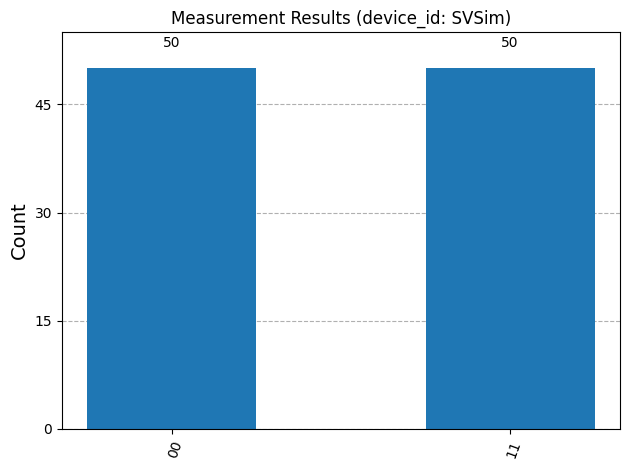

In [ ]:
from qiskit.visualization import plot_histogram
title = 'Measurement Results (device_id: SVSim)'
plot_histogram(s_result.counts, title=title)

### 1.3.2 タスクリストの取得  
投入したタスクのリストは，`Tasks.iter()` を使い，取得できます。

In [ ]:
from fujitsu_quantum.tasks import Tasks
tasks_iter = Tasks.iter() # 今までに送信したタスク⼀覧を取得
for t in tasks_iter:
    print(t)
    print('----------------')
    break

最新のタスクは，以下のコマンドで取得します

In [ ]:
print(next(Tasks.iter()))

## 1.4 量子コンピュータ実機を使ったタスクの実行
### 1.4.1  デバイスの指定

`Devices` で量子コンピュータ実機 `SC` を指定する．

In [ ]:
dev_sc = Devices.get('SC')

### 1.4.2 タスクの投入
以下，タスクの実行方法，結果の取得方法は，量子回路シミュレータと同様です．

#### (1) サンプリング計算
使用する関数，量子回路シミュレータと同じです．量子回路のコード`program` は，1.3.1(2)のベル状態の量子回路を使います．ショット数 `n_shots` も設定します。

In [ ]:
s_task_sc = dev_sc.submit_sampling_task(program=program, n_shots=1000)

### 1.4.3 結果の取得
#### (1) サンプリング計算結果

計算結果を取得します

In [ ]:
s_result_sc = s_task_sc.result()
print(f'{s_result_sc.counts=}') #

測定結果をグラフに出力します．縦軸はカウント数，横軸は状態です．

In [ ]:
from qiskit.visualization import plot_histogram

# グラフ描画
title = 'Measurement Results (device_id: SC)'
plot_histogram(s_result_sc.counts, title=title)

これまでに実行した量子コンピュータ実機と量子回路シミュレータのサンプリング計算結果を比較します．

- 各デバイスで計算したカウント数を確認します．

In [ ]:
# 量子コンピュータ
print('量子コンピュータ実機')
print(f'{s_result_sc.counts=}')
print('--------------------------')

# 量子回路シミュレータ
print('量子回路シミュレータ')
print(f'{s_result.counts=}')

- グラフ上に重ねて表示します．  
量子コンピュータでは，`00`，`11`以外の状態があることが確認できます．

In [ ]:
plot_histogram([s_result_sc.counts, s_result.counts], legend=['QPU (SC)', 'Simulator (SVSim)'])

## 1.5 タスクの詳細設定  

サンプリングタスクと期待値推定タスクには，以下のパラメータを利用できます．

- 今回のハンズオンで使用したパラメータ  

| パラメータ | 内容 |
| ---- | ---- |
| program | 実行するOpenQASMのプログラム |  
| operator | `submit_estimation_task(...)`に限定して利用できます．|
| method | `submit_estimation_task(...)`に限定して利用できます．期待値をどのように計算するか設定します．<br>- `sampling`:<br>期待値を量子状態からのサンプリング結果に基づいて推定します．この方法を指定する際は，`n_shots`も指定する必要があります． 　<br>- `state_vector`:<br>理想的な期待値を量子状態の状態ベクトルに基づいて計算します．この方法は，量子状態の状態ベクトルが利用可能な量子回路シミュレーターでのみ利用できます．
| n_shots | サンプリング回数．|
| seed_transpilation | サーバー側のトランスパイル用のランダムシード． |
| ro_error_mitigation | 量子コンピュータ用．読み出しエラー緩和の有無．`None`: default，`pseudo_inverse`: 読み出し混同行列の擬似逆行列をサンプリング結果に掛けることで緩和します．
| include_transpilation_result| `True`: 計算結果にトランスパイル後の量子回路を含みます．`False`: default |
| name | タスクの名前（任意記述）．|
| note | ユーザーがメモを設定できます． |

- 今回のハンズオンでは使わないパラメータ  

| パラメータ | 内容 |
| ---- | ---- |
| parameter_values | プログラム中のパラメータに割り当てる値. |
| skip_transpilation | サーバー側でのトランスパイルをスキップするか否か. |
| transpilation_options | トランスパイルオプション．最適化レベルの設定. |
| qubit allocation | 量子コンピュータ用．プログラム内の仮想量子ビットをどのように物理量子ビットに割り当てるかを指定. |
| estimation_dop | 量子コンピュータ用．Samplingで実行する期待値計算における回路実行の並列化度合い．|

たとえば，先ほど実行したサンプリング計算でトランスパイル後の回路を取得した場合は，`include_transpilation_result＝True`を設定して，タスクを実行します。

In [ ]:
s_task_sc = dev_sc.submit_sampling_task(program=program, n_shots=1000, include_transpilation_result=True,)
s_result_sc = s_task_sc.result()

量子コンピュータで実際に計算したトランスパイル後の回路を描画します

In [ ]:
# トランスパイル後の量子回路の取得
transpiled_program = s_result_sc.transpilation.transpiled_program

# 量子回路のロードと描画
transpiled_circuit = loads(transpiled_program)
transpiled_circuit.draw('mpl')

# 2. 量子コンピュータを使ったGroverのアルゴリズムの実行

本章では，[Quantum Native Dojo](https://dojo.qulacs.org/ja/latest/index.html) の ホームページの第8章2の[グローバのアルゴリズム](https://dojo.qulacs.org/ja/latest/notebooks/8.2_Grovers_algorithm.html) に沿って，Groverのアルゴリズムを紹介した後，実機で実行していただきます．以下，Quantum Native DojoのHPより引用を含む．  

グローバーのアルゴリズムは，整列化されていないデータベースから特定のデータを探索するための量子アルゴリズムである[1]． グローバーのアルゴリズムは，ソートされていない $N$ 個のデータに対して，$O(√N)$ 回のクエリ（オラクルを呼ぶこと）で解を見出せる．古典コンピュータでは$O(N)$ 回のクエリが必要であるので，量子アルゴリズムを用いることで二次 (quadratic) の加速が実現されることになる．  

オラクルさえ構成できれば，グローバーのアルゴリズムはあらゆる古典アルゴリズムの全探索部分を高速化することができる．例えば，
   - 充足可能性問題（SAT問題）  
   - 特定のハッシュ値から元の値を探索する問題  

といった応用例が考えられ，後者は実際にビットコインのマイニング高速化として提案論文がある[2]．この節ではまずグローバーのアルゴリズムの理論的な説明を行い，その後 SDK による実装例を紹介する．


## 2.1 Groverのアルゴリズム
Groverのアルゴリズムは，整列化されてないデータベースから特定のデータを探索するための量子アルゴリズムである[\^1]．

[\^1]: M. A. Nielsen and I. L. Chuang, “Quantum Computation and Quantum Information 10th Anniversary Edition“, University Printing House の 6.1 The quantum search algorithm

__//アルゴリズムの流れ//__  

グローバーのアルゴリズムの流れはシンプルで，以下の通りである． $N$ 個の要素からなるデータベースから $M$ 個の解を探索する問題を考え，要素のラベルを $n$ 桁のビット列 $x = x_1,…, x_n$ とする．
1. 全ての状態の重ね合わせ状態 $\lvert s \rangle = \frac{1}{\sqrt{N}}\sum_{x}\lvert x \rangle$ を用意する
2. オラクル $U_w$（解に対する反転操作）を作用させる
3. $\lvert s \rangle$ を対称軸にした反転操作 $U_s$ を作用させる
4. ステップ 2,3 を $k$ 回繰り返す
5. 測定を行う

__//各ステップの詳細な説明//__

1. 全ての状態の重ね合わせ状態 $\lvert s \rangle = \frac{1}{\sqrt{N}}\sum_{x}\lvert x \rangle$ を用意する  
    初期状態 $\lvert 0⋯0 \rangle$  に対して全ての量子ビットにアダマールゲート H をかける．  
    $$    (H\otimes ⋯\otimes H)\lvert 0⋯0 \rangle = \frac{1}{(\sqrt{2})^n}(\lvert 0 \rangle+\lvert 1 \rangle)\otimes ⋯\otimes(\lvert 0 \rangle+\lvert 1 \rangle)=\lvert s \rangle$$  

2. オラクル$U_w$(解に対して反転操作)を作用させる    
    「入力 $\lvert x \rangle$ に対して $x$ が解なら$(-1)$をかけて位相を反転し，解でないなら何もしない」という演算を考える.    
    $$U_w=I-2\sum_{w\in 解}{\lvert w \rangle \langle w \rvert},$$    
  $$
  U_w\lvert x \rangle =
  \begin{cases}
  \lvert x \rangle \quad (x \text{ は解ではない}) \\
  -\lvert x \rangle \quad (x \text{ は解である})
  \end{cases}
  $$

3. $\lvert s \rangle$ を対称軸にした反転操作 $U_s$ を作用させる  
    すべての状態の重ね合わせ $\lvert s \rangle$ を対称軸にした反転操作$U_s$を作用させる.  
    $$U_s = 2\lvert s \rangle \langle s \rvert-I$$  
    この演算子は，入力状態 $\lvert \psi \rangle = a\lvert s \rangle + b\lvert s_{\bot} \rangle$ $(\lvert s_{\bot}\rangle$ は，$\lvert s \rangle$ に直交するベクトル$)$ に対して
    $$ U_s\lvert \psi \rangle = a\lvert s \rangle - b\lvert s_{\bot} \rangle $$  
    と，作用し，$\lvert s_{\bot} \rangle$ に比例する部分の位相だけ反転する.  

4. ステップ2，3 を $k$ 回繰り返す  
    2つの反転操作 $U_w$ と $U_s$ を繰り返す．およそ $O(\sqrt{N/M})$ 回の繰り返しを行えば，次のステップ5の測定で十分高い確率で解が得られる.

5. 測定を行う  
ここまでのステップで状態は $(U_sU_w)^k\lvert s \rangle$ となっている．この状態は，解 $w$ に対する状態 $\lvert w \rangle$ の係数（の絶対値）のみが非常に大きくなっているので，計算基底で測定を行えば，高い確率で解 $w$（ビット列） が得られる．

詳細な説明については，引用元，もしくは参考書等でご確認ください．

    

## 2.2 量子コンピュータを使用したGroverのアルゴリズムの実行

### 2.2.1　量子回路の定義
使用する量子回路を準備します．  

#### (1) 全ての状態の重ね合わせ状態 $\lvert s \rangle = \frac{1}{\sqrt{N}}\sum_{x}\lvert x \rangle$ を用意する

Hゲートをすべての量子ビットに作用させ，均等な重ね合わせ状態を作成します．  

$$\lvert 00 \rangle \overset{\text{H1, H2}}{\rightarrow} \frac{1}{2}(\lvert 00 \rangle+\lvert 01 \rangle+\lvert 10 \rangle+\lvert 11 \rangle)$$

```python
# 量子回路のコード  
qc_grover_q2 = QuantumCircuit(2, 2)  
qc_grover_q2.h([0, 1])
```

#### (2) オラクル $U_w$（解に対する反転操作）を作用させる

今回の問題設定では探索数は4です．$\lvert 11 \rangle$をターゲットとし，以下のように$\lvert 11 \rangle$の位相をマイナスに反転するためには，オラクルには$CZ$ ゲートを使い，$\lvert 11 \rangle$ の位相（符号）を反転します．

$$\frac{1}{2}(\lvert 00 \rangle+\lvert 01 \rangle+\lvert 10 \rangle+\lvert 11 \rangle) \overset{\text{Oracle}}{\rightarrow} \frac{1}{2}(\lvert 00 \rangle+\lvert 01 \rangle+\lvert 10 \rangle-\lvert 11 \rangle)$$

<div align="center">

| 探索対象 | 量子ビット上での状態表現 | CZゲートを使った場合 |  
|:---|:---:|:---:|
| 0 | $\lvert 00 \rangle$ | $CZ\lvert 00 \rangle = \lvert 00 \rangle$ |  
| 1 | $\lvert 01 \rangle$ | $CZ\lvert 01 \rangle = \lvert 01 \rangle$ |  
| 2 | $\lvert 10 \rangle$ | $CZ\lvert 10 \rangle = \lvert 10 \rangle$ |   
| 3: ターゲット | $\lvert 11 \rangle$ | $CZ\lvert 11 \rangle = $ <span class="red-text">- </span> $\lvert 11 \rangle$ |

</div>

```python
# 量子回路のコード
qc_grover_q2.cz(0, 1)
```

#### (3) $\lvert s \rangle$ を対称軸にした反転操作 $U_s$ を作用させる
確率振幅を増幅するには，以下の回路を使用します．
$$U_s = 2\lvert s \rangle \langle s \rvert - I = H^{\otimes{2}}(2\lvert 00 \rangle \langle 00 \rvert -I)H^{\otimes{2}}$$  

この動作は量子回路では以下のようになります．
```python
# 量子回路のコード
qc_grover_q2.h([0, 1])
qc_grover_q2.x([0, 1])
qc_grover_q2.cz(0, 1)
qc_grover_q2.x([0, 1])
qc_grover_q2.h([0, 1])
```

#### (4)，(5) 測定を行う．
今回，求める解は $\lvert 11 \rangle$ の１つなので，繰り返し回数 $k = 1$ とし，測定します．
```python
# 量子回路のコード
qc_grover_q2.measure([0, 1], [0, 1])
```

以上から，使用するグローバのアルゴリズムの量子回路は以下になります.

In [ ]:
# 2量子ビット + 測定用の古典ビット
qc_grover_q2 = QuantumCircuit(2, 2)

# 初期化（Hadamardで重ね合わせ）
qc_grover_q2.h([0, 1])

# オラクル（|11⟩の符号反転）
qc_grover_q2.cz(0, 1)  # CZゲートで |11⟩ の位相を反転

# ディフュージョン演算子（振幅増幅）
qc_grover_q2.h([0, 1])
qc_grover_q2.x([0, 1])
qc_grover_q2.cz(0, 1)
qc_grover_q2.x([0, 1])
qc_grover_q2.h([0, 1])

# 測定
qc_grover_q2.measure([0, 1], [0, 1])

### 2.2.2 量子回路の確認とOpenQASM3.0への変換
実行する量子回路を確認するため描画します．

In [ ]:
qc_grover_q2.draw('mpl')

量子回路をOpenQASM3.0形式に変換します．

In [ ]:
prg_grover_q2 = dumps(qc_grover_q2)

### 2.2.3 関数定義  
グローバの量子回路を投入，結果を取得する `run_sampling()` 関数を定義します．サンプリング計算を行うので`**.submit_sampling_task()`を使います．ショット数，エラー緩和の有無，コンパイル後の量子回路を確認するため，`n_shots`，`ro_error_mitigation`と `include_transpilation_result=True` のオプションを指定します．

In [ ]:
import matplotlib.pyplot as plt
def run_sampling(device_id, program, nShots, ro_error_mitigation='none'):
    from fujitsu_quantum.devices import Devices
    from fujitsu_quantum.tasks import Task

    dev_sim = Devices.get(device_id)

    if device_id == 'SC': # 量子コンピュータ実機の場合
        task = dev_sim.submit_sampling_task(program=program,
                                            n_shots=nShots,
#                                            ro_error_mitigation=ro_error_mitigation,
                                            include_transpilation_result=True)
    else:                 # 量子回路シミュレータの場合
        task = dev_sim.submit_sampling_task(program=program,
                                            n_shots=nShots,
                                            include_transpilation_result=True)

    result = task.result()
    print(f'{result.counts=}')
    return result

### 2.2.4 Grover回路を量子回路シミュレータで実行
量子回路シミュレータで実行します．

In [ ]:
# 実行するデバイスの指定
device_id02 = 'SVSim'

# タスクパラメータの指定
program = prg_grover_q2
nShots = 1000

# タスクの投入
grvr_result_q2_id02 = run_sampling(device_id02, program, nShots)


- 量子回路シミュレータで使用したトランスパイル後の量子回路の描画

In [ ]:
# コンパイル後の量子回路の取得
transpiled_grover_q2_id02 = grvr_result_q2_id02 .transpilation.transpiled_program

# 量子回路のロードと描画
transpiled_qc_id02 = loads(transpiled_grover_q2_id02)
transpiled_qc_id02.draw('mpl')

- 結果の取得

In [ ]:
# 結果の並び替え
sorted_grvr_result_q2_id02: dict[str, int] = dict(sorted(grvr_result_q2_id02.counts.items()))
counts_q2_id02 = sorted_grvr_result_q2_id02
print(counts_q2_id02)

- 結果の確認  
グラフに描画します．

In [ ]:
title = 'Measurements Results device_id = ' + device_id02 + ')'
plot_histogram(counts_q2_id02, title=title)

### 2.2.5 量子コンピュータで、Grover回路を実行

- 量子コンピュータで実行します

In [ ]:
# 実行するデバイスの指定
device_id01 = 'SC'

# タスクパラメータの指定
program = prg_grover_q2
nShots = 1000

# タスクの投入
grvr_result_q2_id01 = run_sampling(device_id01, program, nShots)

- 量子コンピュータで使用したトランスパイル後の量子回路の確認

In [ ]:
# コンパイル後の量子回路の取得
transpiled_grover_q2_id01 = grvr_result_q2_id01.transpilation.transpiled_program

# 量子回路のロードと描画
transpiled_qc_id01 = loads(transpiled_grover_q2_id01)
transpiled_qc_id01.draw('mpl')

- 結果の取得

In [ ]:
# 結果の並び替え
sorted_grvr_result_q2_id01: dict[str, int] = dict(sorted(grvr_result_q2_id01.counts.items()))
counts_q2_id01 = sorted_grvr_result_q2_id01
print(counts_q2_id01)

- 結果の確認  
グラフに描画します．

In [ ]:
title = 'Measurements Results device_id = ' + device_id01 + ')'
plot_histogram(counts_q2_id01, title=title)

### 2.2.6 量子コンピュータと量子回路シミュレータの結果の比較

量子コンピュータの結果と量子回路シミュレータの結果を合わせて描画し，比較します．量子コンピュータ`SC`では，`11`以外の状態を含む一方で，量子回路シミュレータ`SVSim`では，`11`以外の状態がないことを確認できます．

In [ ]:
plot_histogram([counts_q2_id01, counts_q2_id02], legend=[device_id01, device_id02])


#### (補足) エラー緩和オプションの実行
エラー緩和オプションを”あり”で実行した場合は，以下のようになります．

In [ ]:
# タスクパラメータの指定
program = prg_grover_q2
nShots = 1000
device_id01 = 'SC'
grvr_result_q2_id01_roem = run_sampling(device_id01, program, nShots=1000, ro_error_mitigation='pseudo_inverse')

- 結果の表示  
計算結果をグラフに表示します．

In [ ]:
sorted_grvr_result_q2_id01_roem: dict[str, int] = dict(sorted(grvr_result_q2_id01_roem.counts.items()))
counts_q2_id01_roem = sorted_grvr_result_q2_id01_roem

title = 'Measurements Results device_id = ' + device_id01 + ')'
plot_histogram(counts_q2_id01_roem, title=title)

- エラー緩和あり，なしの量子コンピュータの計算結果の比較   
計算結果をグラフで比較します．若干の改善がみられます．


In [ ]:
title = 'Compare results (device="SC")'
plot_histogram([counts_q2_id01, counts_q2_id01_roem], legend=['without error mitigation', 'with error mitigation'], title=title)

以上で本日のハンズオンの内容は，終了になります。  
ご参加ありがとうございました。

最後に，アンケートのご記入，ご提出をよろしくお願いいたします．